In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [131]:
plt.rcParams.update({'figure.figsize':(10,5), 'figure.dpi':120})

# Bước 1: Import data



In [132]:
df = pd.read_excel('OneBank.xlsx')

In [133]:
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.1,0


In [134]:
df = df.drop(columns= 'customer_id', axis=1)

In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   credit_score      10000 non-null  int64  
 1   country           10000 non-null  object 
 2   gender            10000 non-null  object 
 3   age               10000 non-null  int64  
 4   tenure            10000 non-null  int64  
 5   balance           10000 non-null  float64
 6   products_number   10000 non-null  int64  
 7   credit_card       10000 non-null  int64  
 8   active_member     10000 non-null  int64  
 9   estimated_salary  10000 non-null  object 
 10  churn             10000 non-null  int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 859.5+ KB


# Bước 2: Data Cleaning

< thực hiện bước 2 khi dữ liệu của bạn chưa sạch: bao gồm dọn dẹp, định dạng lại, xử lý duplicated, xử lý null: mean nếu nhãn là dữ liệu liên tục, mode nếu nhãn nếu dữ liệu rời rạc,.....>

In [136]:
df.isnull().sum()

credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

In [137]:
df.duplicated().sum()

0

In [138]:
df['estimated_salary'] = df['estimated_salary'].str.replace(r'\b\d{4}-\d{2}-\d{2} 00:00:00\b', 'nan' , regex=True)
df['estimated_salary'] = df['estimated_salary'].astype(float)
df['estimated_salary'].isna().sum()

199

In [139]:
df['estimated_salary'] = df.groupby(['age'])['estimated_salary'].transform(lambda x: x.fillna(x.mean()))

In [140]:
# categorical Variables
categorical_variables = [col for col in df.columns if col in "O"
                        or df[col].nunique() <=11
                        and col not in "Exited"]

categorical_variables

['country',
 'gender',
 'tenure',
 'products_number',
 'credit_card',
 'active_member',
 'churn']

In [141]:
# numeric Variables
numeric_variables = [col for col in df.columns if df[col].dtype != "object"
                        and df[col].nunique() >11
                        and col != "customer_id"]
numeric_variables

['credit_score', 'age', 'balance', 'estimated_salary']

# Bước 3: EDA data

< khi dữ liệu đã sạch rồi, bạn cần hiểu càng sâu về dữ liệu càng tốt bằng cách vẽ các biểu đồ mô tả, thống kê, phân phối, ma trận tương quan, phân tán,.... Sau khi đã hiểu sâu về dữ liệu hơn, bạn sẽ thực hiển số hóa và chuẩn hóa dữ liệu thành dạng nhị phân và dạng số để máy tính hiểu và giúp bạn xây dựng mô hình dự báo>

In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   credit_score      10000 non-null  int64  
 1   country           10000 non-null  object 
 2   gender            10000 non-null  object 
 3   age               10000 non-null  int64  
 4   tenure            10000 non-null  int64  
 5   balance           10000 non-null  float64
 6   products_number   10000 non-null  int64  
 7   credit_card       10000 non-null  int64  
 8   active_member     10000 non-null  int64  
 9   estimated_salary  10000 non-null  float64
 10  churn             10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [143]:
df.isna().sum()

credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

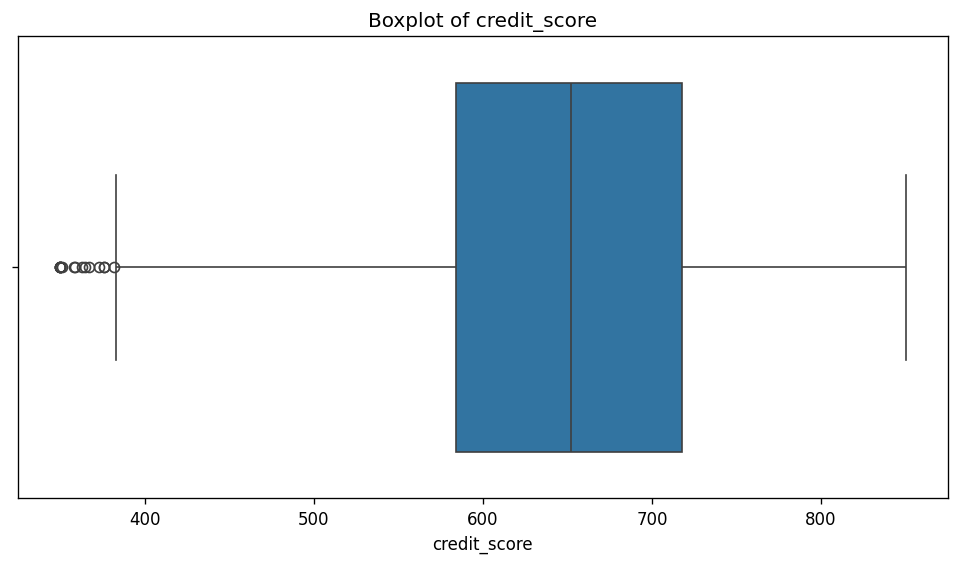

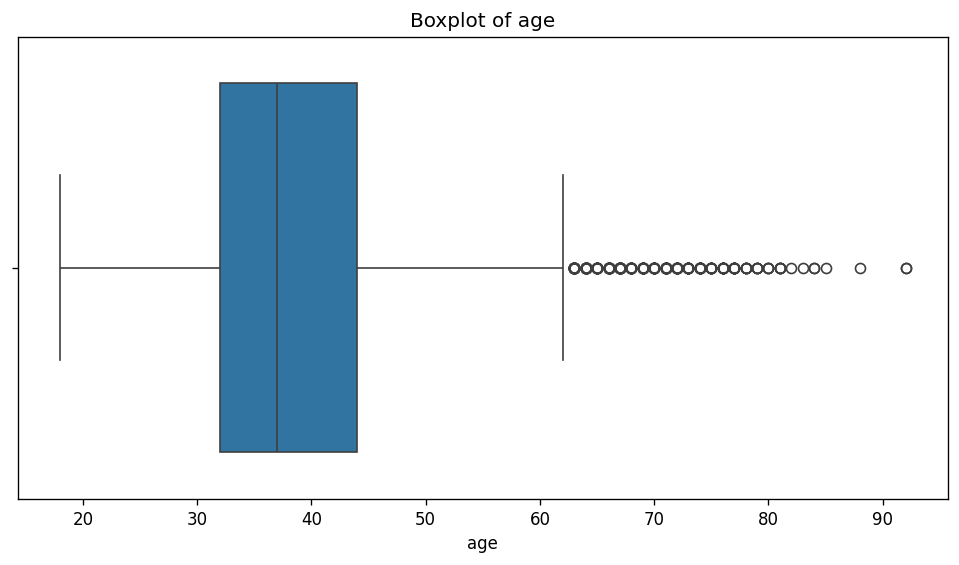

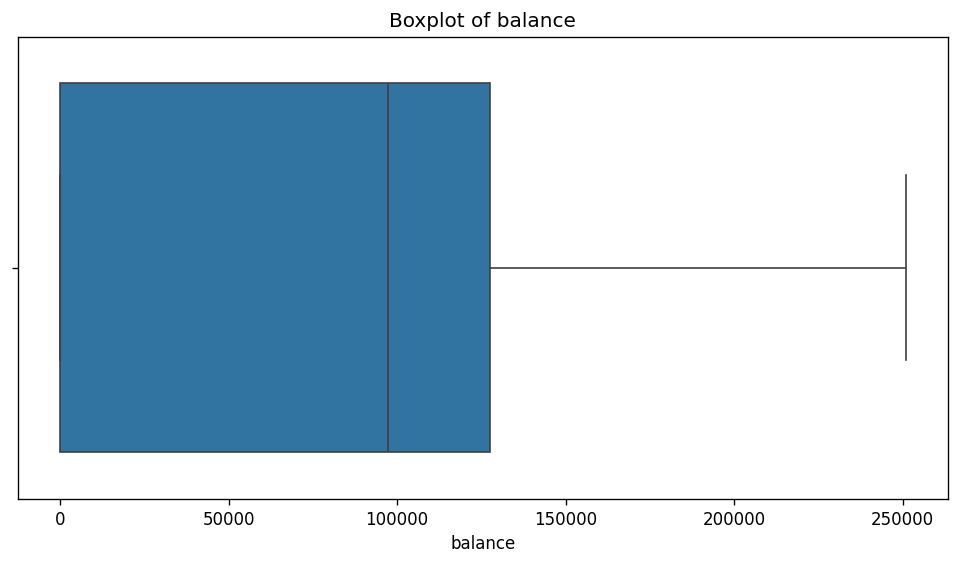

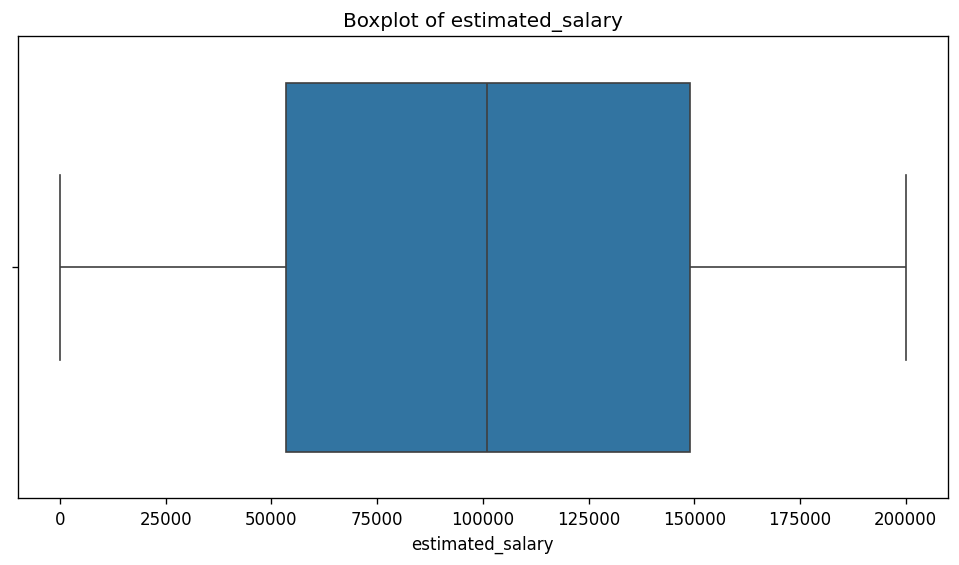

In [144]:
for var in numeric_variables:
    sns.boxplot(x=df[var])
    plt.title(f'Boxplot of {var}')
    plt.show()

In [145]:
def count_outliers(df, numeric_vars):
    outliers_count = {}
    for var in numeric_vars:
        Q1 = df[var].quantile(0.25)
        Q3 = df[var].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[var] < lower_bound) | (df[var] > upper_bound)]
        outliers_count[var] = outliers.shape[0]
    return outliers_count

outliers_count = count_outliers(df, numeric_variables)
outliers_count

{'credit_score': 15, 'age': 359, 'balance': 0, 'estimated_salary': 0}

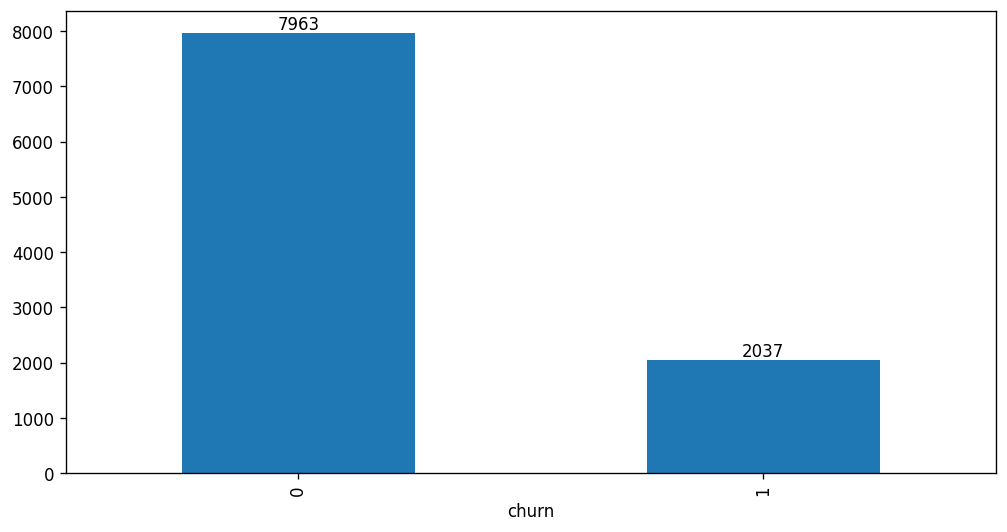

In [146]:
u = df['churn'].value_counts().plot(kind = 'bar')
for container in u.containers:
  u.bar_label(container)
plt.show()

In [147]:
df.select_dtypes(include='object')

,country,gender
0,France,Female
1,Spain,Female
2,France,Female
3,France,Female
4,Spain,Female
...,...,...
9995,France,Male
9996,France,Male
9997,France,Female
9998,Germany,Male


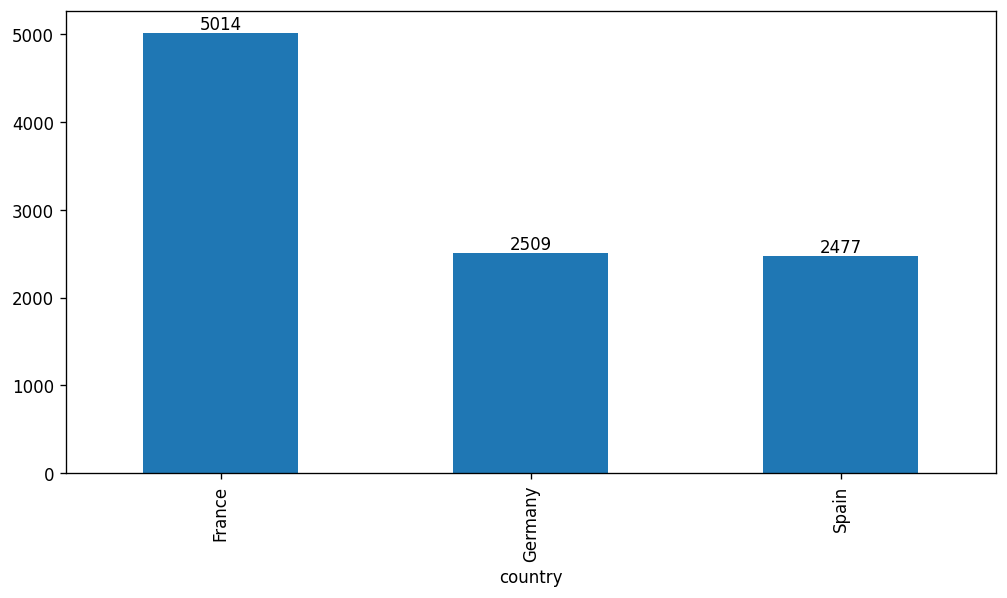

In [148]:
x = df['country'].value_counts().plot(kind = 'bar')
for container in x.containers:
  x.bar_label(container)
plt.show()

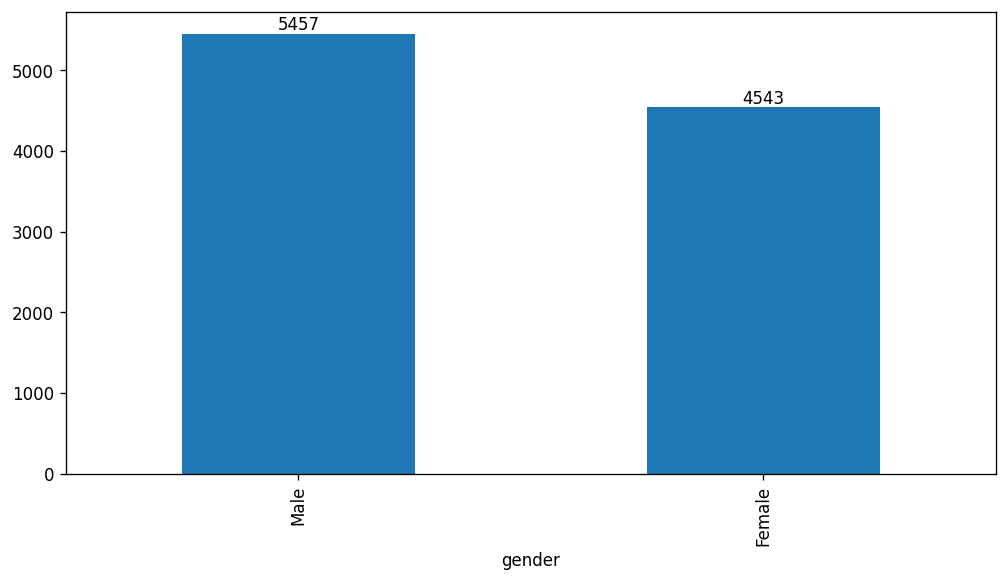

In [149]:
x = df['gender'].value_counts().plot(kind = 'bar')
for container in x.containers:
  x.bar_label(container)
plt.show()

In [150]:
df.select_dtypes(include='number').describe()

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,101062.730471,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,56532.600989,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,53432.957500,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100924.390000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,148955.820000,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


<Axes: >

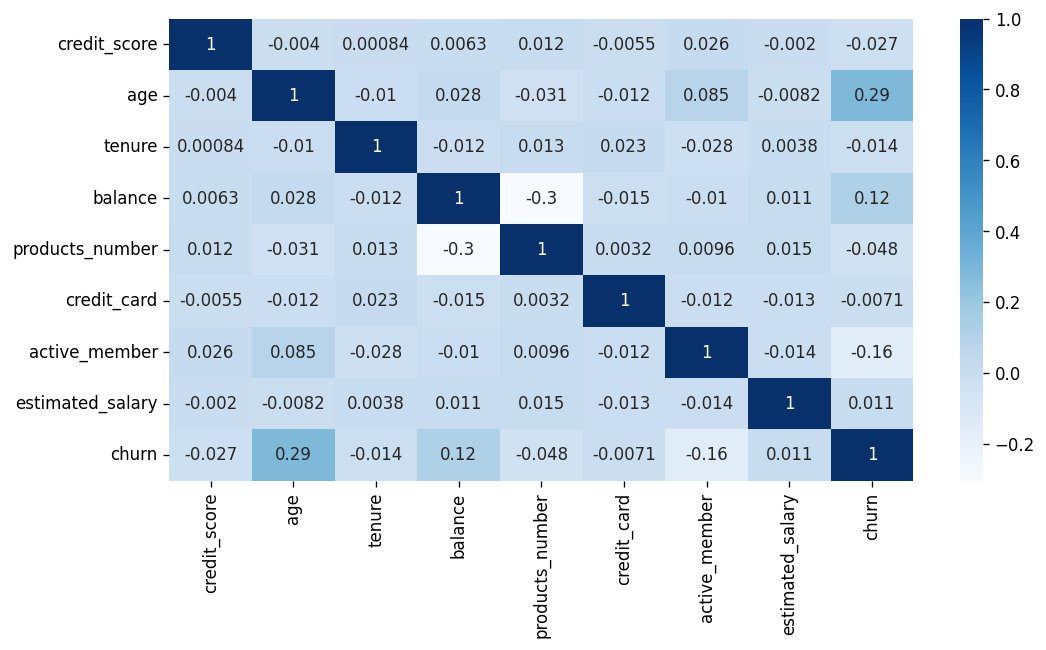

In [151]:
t = df.select_dtypes(exclude='object').corr()
sns.heatmap(t, annot = True, cmap = 'Blues')

<Axes: ylabel='Frequency'>

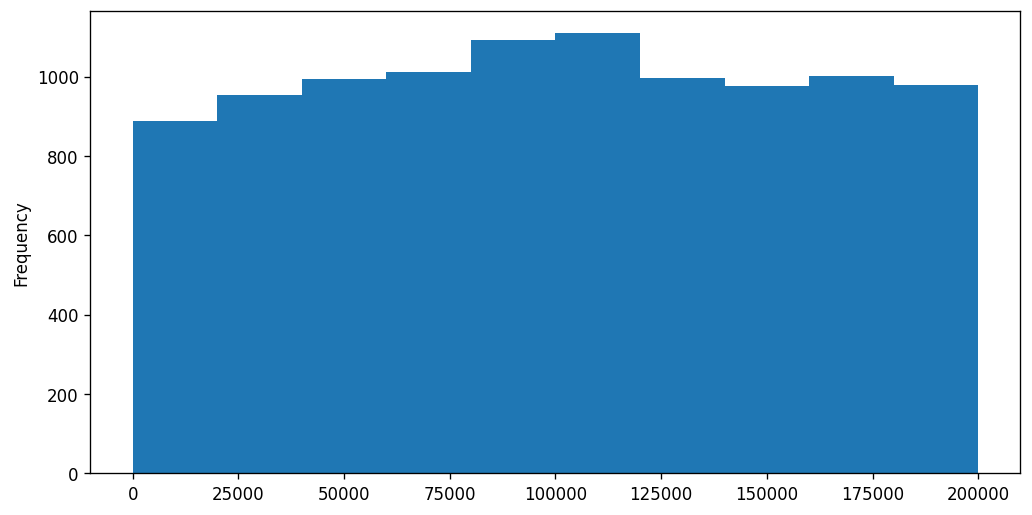

In [152]:
df['estimated_salary'].plot(kind ='hist')

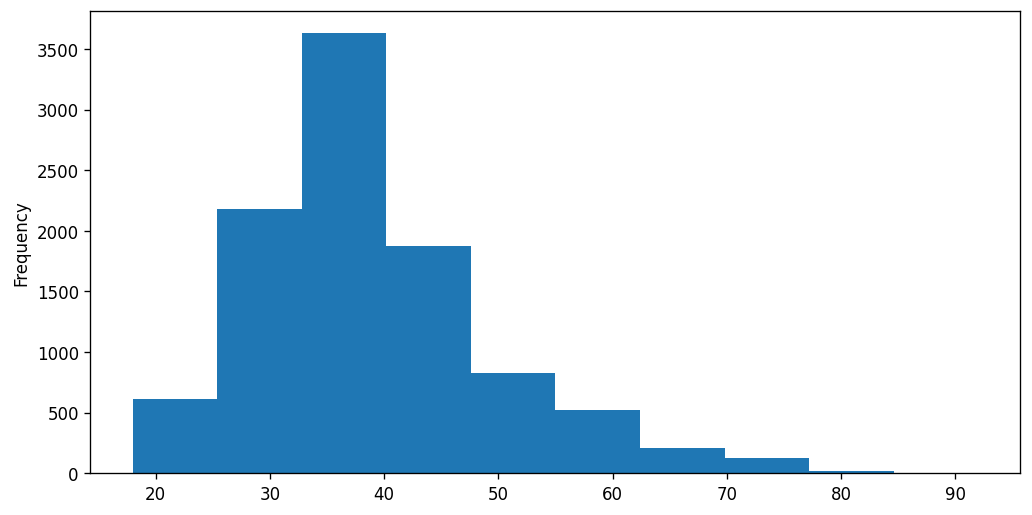

In [153]:
df['age'].plot(kind = 'hist');

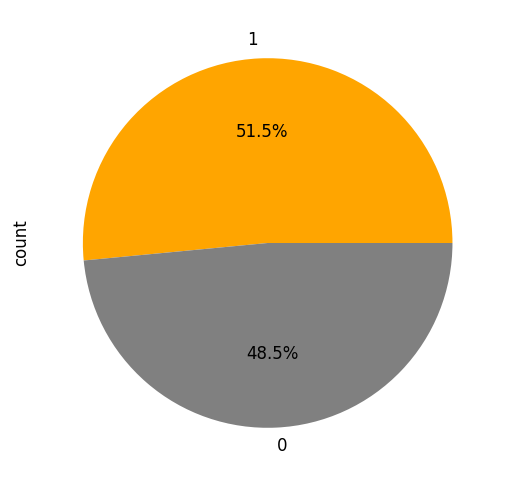

In [154]:
df['active_member'].value_counts().plot(kind = 'pie', autopct = '%1.1f%%', colors = ['orange', 'grey']);

## Feature engineering

Ông xem xử lý outlier thế nào nhé tôi ko thạo


In [155]:
# # Option 1: Remove outliers
# Q1 = df['age'].quantile(0.25)
# Q3 = df['age'].quantile(0.75)
# IQR = Q3 - Q1
# lower_bound = Q1 - 1.5 * IQR
# upper_bound = Q3 + 1.5 * IQR
# df = df[(df['age'] >= lower_bound) & (df['age'] <= upper_bound)]

# # Option 2: Transform data (e.g., using log transformation)
# df['age'] = np.log1p(df['age'])


In [156]:
df["NewTenure"] = df["tenure"]/df["age"]
df["NewCreditsScore"] = pd.qcut(df['credit_score'], 6, labels = [1, 2, 3, 4, 5, 6])
df["NewAgeScore"] = pd.qcut(df['age'], 8, labels = [1, 2, 3, 4, 5, 6, 7, 8])
df["NewBalanceScore"] = pd.qcut(df['balance'].rank(method="first"), 5, labels = [1, 2, 3, 4, 5])
df["NewEstSalaryScore"] = pd.qcut(df['estimated_salary'], 10, labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

In [157]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
df_one_array = ohe.fit_transform(df[['country', 'gender']]).toarray()
df_one = pd.DataFrame(df_one_array, columns = ohe.get_feature_names_out())
df_one
df.drop(['country', 'gender'], axis = 1, inplace = True)
df = pd.concat([df, df_one], axis = 1)
df

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,NewTenure,NewCreditsScore,NewAgeScore,NewBalanceScore,NewEstSalaryScore,country_France,country_Germany,country_Spain,gender_Female,gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0.047619,3,6,1,6,1.0,0.0,0.0,1.0,0.0
1,608,41,1,83807.86,1,0,1,112542.58,0,0.024390,2,6,3,6,0.0,0.0,1.0,1.0,0.0
2,502,42,8,159660.80,3,1,0,113931.57,1,0.190476,1,6,5,6,1.0,0.0,0.0,1.0,0.0
3,699,39,1,0.00,2,0,0,93826.63,0,0.025641,5,5,1,5,1.0,0.0,0.0,1.0,0.0
4,850,43,2,125510.82,1,1,1,79084.10,0,0.046512,6,6,4,4,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0.128205,6,5,2,5,1.0,0.0,0.0,0.0,1.0
9996,516,35,10,57369.61,1,1,1,101699.77,0,0.285714,1,3,2,6,1.0,0.0,0.0,0.0,1.0
9997,709,36,7,0.00,1,0,1,42085.58,1,0.194444,5,4,2,2,1.0,0.0,0.0,1.0,0.0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0.071429,6,6,3,5,0.0,1.0,0.0,0.0,1.0


In [159]:
df.to_csv('cleaned_data.csv', index=False)